Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Smarties detected: 30


/tmp/ipython-input-2932855175.py:99: RuntimeWarning: overflow encountered in scalar subtract
  if np.hypot(x-d[0], y-d[1]) < 70:


Coins detected: 12


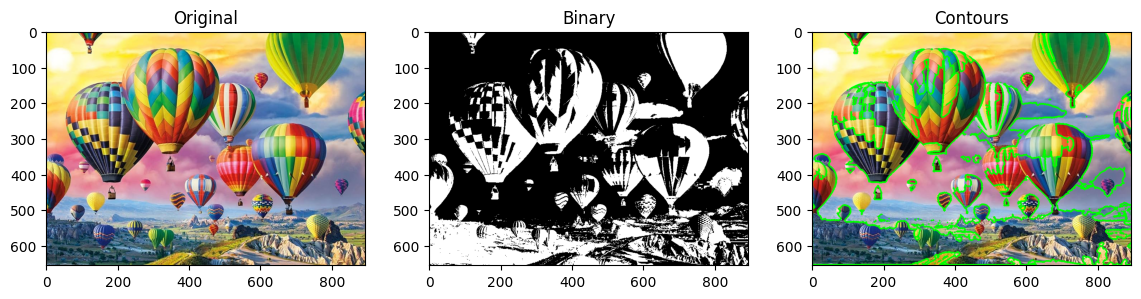

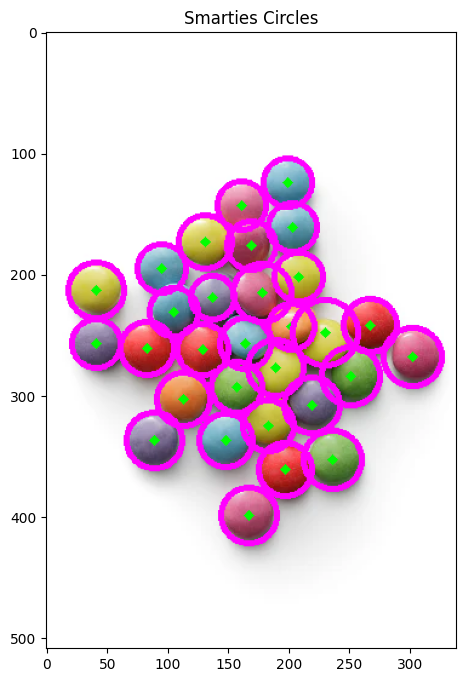

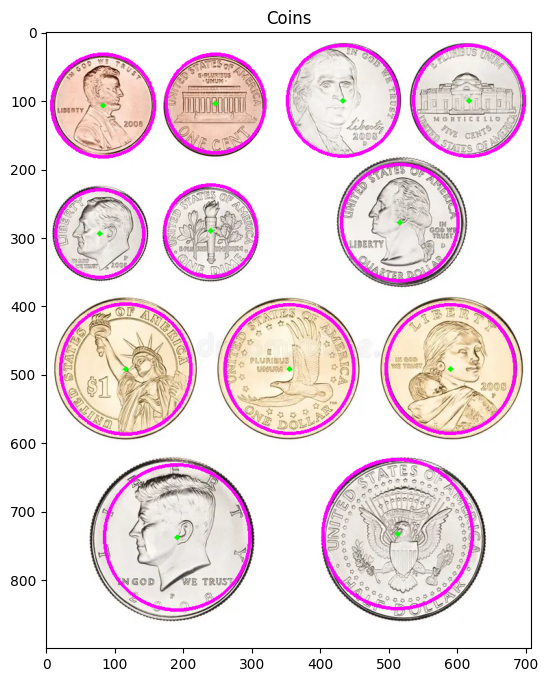

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount("/content/drive")

# =====================================================================
# 1) BALLOONS - MORPH + CONTOURS
# =====================================================================

balloons = cv2.imread("/content/drive/MyDrive/balloons.png")
gray = cv2.cvtColor(balloons, cv2.COLOR_BGR2GRAY)

# binary
_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)

# closing
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
close_img = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# contours
cnts, _ = cv2.findContours(close_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

balloons_cnt = balloons.copy()
cv2.drawContours(balloons_cnt, cnts, -1, (0,255,0), 3)

plt.figure(figsize=(14,8))
plt.subplot(1,3,1); plt.imshow(balloons[...,::-1]); plt.title("Original")
plt.subplot(1,3,2); plt.imshow(binary, cmap='gray'); plt.title("Binary")
plt.subplot(1,3,3); plt.imshow(balloons_cnt[...,::-1]); plt.title("Contours")


# =====================================================================
# 2) SMARTIES - تنظیم درست پارامترهای هاف
# =====================================================================

smart = cv2.imread("/content/drive/MyDrive/smarties.png")
gray_s = cv2.cvtColor(smart, cv2.COLOR_BGR2GRAY)
gray_s = cv2.medianBlur(gray_s, 5)

# برای Smarties باید minRadius کوچک باشد
# چون اسمارتیز‌ها کوچک‌تر از سکه هستند
circles_s = cv2.HoughCircles(
    gray_s,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=25,      # فاصله بین اسمارتیزها
    param1=120,
    param2=20,       # حساسیت بیشتر برای تشخیص همه اسمارتیزها
    minRadius=10,    # دایره‌های خیلی کوچک حذف می‌شوند
    maxRadius=40
)

if circles_s is not None:
    circles_s = np.uint16(np.around(circles_s))
    for c in circles_s[0,:]:
        x,y,r = c
        cv2.circle(smart, (x,y), r, (255,0,255), 3)
        cv2.circle(smart, (x,y), 2, (0,255,0), 3)

plt.figure(figsize=(8,8))
plt.imshow(smart[...,::-1])
plt.title("Smarties Circles")

print("Smarties detected:", len(circles_s[0]) if circles_s is not None else 0)


# =====================================================================
# 3) COINS – نسخه‌ی دقیق که ۱۲ سکه خروجی دهد
# =====================================================================

coins = cv2.imread("/content/drive/MyDrive/coins.jpg")
gray_c = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
gray_c = cv2.medianBlur(gray_c, 5)
gray_c = cv2.equalizeHist(gray_c)

# پارامترهای اختصاصی سکه‌ها
circles_c = cv2.HoughCircles(
    gray_c,
    cv2.HOUGH_GRADIENT,
    dp=1.1,
    minDist=130,      # فاصله زیاد چون سکه‌ها بزرگ‌اند
    param1=180,
    param2=45,
    minRadius=60,     # شعاع دقیق سکه‌ها
    maxRadius=110
)

# حذف دایره‌های تکراری
final_circles = []
if circles_c is not None:
    circles_c = np.uint16(np.around(circles_c))

    for c in circles_c[0,:]:
        x,y,r = c
        ok = True
        for d in final_circles:
            if np.hypot(x-d[0], y-d[1]) < 70:
                ok = False
                break
        if ok:
            final_circles.append(c)

# رسم نهایی
for (x,y,r) in final_circles:
    cv2.circle(coins, (x,y), r, (255,0,255), 3)
    cv2.circle(coins, (x,y), 2, (0,255,0), 3)

plt.figure(figsize=(8,8))
plt.imshow(coins[...,::-1])
plt.title("Coins")

print("Coins detected:", len(final_circles))